In [169]:
pip install mplcursors --user

  DEPRECATION: mplcursors is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



     ---------------------------------------- 0.0/89.0 kB ? eta -:--:--
     ---------------------------------------- 89.0/89.0 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py install for mplcursors: started
  Running setup.py install for mplcursors: finished with status 'done'


In [170]:
import numpy as np
import pandas as pd
import mplcursors
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import warnings
from datetime  import datetime

warnings.filterwarnings('ignore')

In [68]:
data = pd.read_csv('cassandra.csv')
data.head(5)


,Unnamed: 0,TestName,Metadata,IterationStartTime,IterationEndTime,MetricName,value,BaseLine,Grp_id,grp_startTime,IntertionTime
0,0,CASSANDRA,('018b99da98567aff92f8ca0703a35fd35cd3667e83af...,2023-04-27 03:38:54.263752,2023-04-27 03:43:04.657833,op_rate,20016.0,21533.339429,e98a0d39-f4eb-481c-a087-a53894afef80,2023-04-27 03:38:54.263752,2023-06-23 11:23:20.592893
1,1,CASSANDRA,('018b99da98567aff92f8ca0703a35fd35cd3667e83af...,2023-04-27 03:55:31.765902,2023-04-27 03:59:45.787353,op_rate,19399.0,21531.900000,e98a0d39-f4eb-481c-a087-a53894afef80,2023-04-27 03:38:54.263752,2023-06-23 11:23:52.368403
2,2,CASSANDRA,('018b99da98567aff92f8ca0703a35fd35cd3667e83af...,2023-04-27 04:03:58.884879,2023-04-27 04:08:15.293151,op_rate,19392.0,21534.071297,e98a0d39-f4eb-481c-a087-a53894afef80,2023-04-27 03:38:54.263752,2023-06-23 11:24:10.328985
3,3,CASSANDRA,('018b99da98567aff92f8ca0703a35fd35cd3667e83af...,2023-04-27 04:21:02.864992,2023-04-27 04:25:23.498178,op_rate,18862.0,21537.430033,e98a0d39-f4eb-481c-a087-a53894afef80,2023-04-27 03:38:54.263752,2023-06-23 11:24:52.546726
4,4,CASSANDRA,('018b99da98567aff92f8ca0703a35fd35cd3667e83af...,2023-04-27 04:33:59.525730,2023-04-27 04:38:13.559396,op_rate,19807.0,21535.071821,e98a0d39-f4eb-481c-a087-a53894afef80,2023-04-27 03:38:54.263752,2023-06-23 11:25:16.157114


In [196]:
data['Iteration_Start_Hours'] = pd.to_datetime(data['IterationStartTime']).dt.hour
data['Iteration_End_Hours'] = pd.to_datetime(data['IterationEndTime']).dt.hour
data['grp_startTime'] = pd.to_datetime(data['grp_startTime']).dt.hour
data['IntertionTime'] = pd.to_datetime(data['IntertionTime']).dt.hour

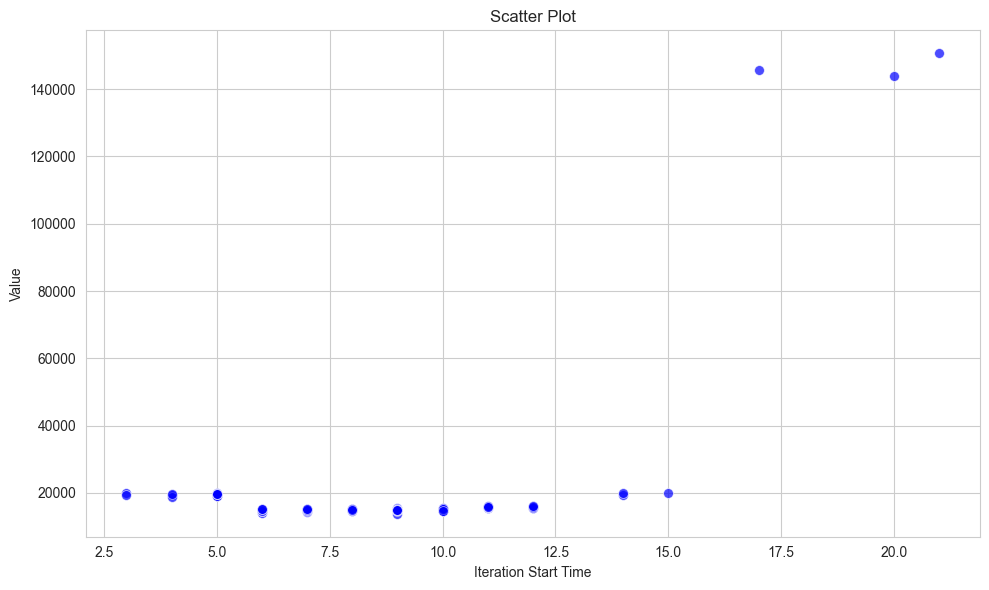

In [197]:

plt.figure(figsize=(10, 6))

# Plot the scatter plot
sns.scatterplot(data=data, x=data['Iteration_Start_Hours'], y=data.value, color='blue', alpha=0.7, s=50)

# Set the x-axis label
plt.xlabel('Iteration Start Time')

# Set the y-axis label
plt.ylabel('Value')

# Set the title
plt.title('Scatter Plot')

# Customize the plot aesthetics
sns.set_style("whitegrid")
plt.xticks
plt.tight_layout()

# Display the plot
plt.show()


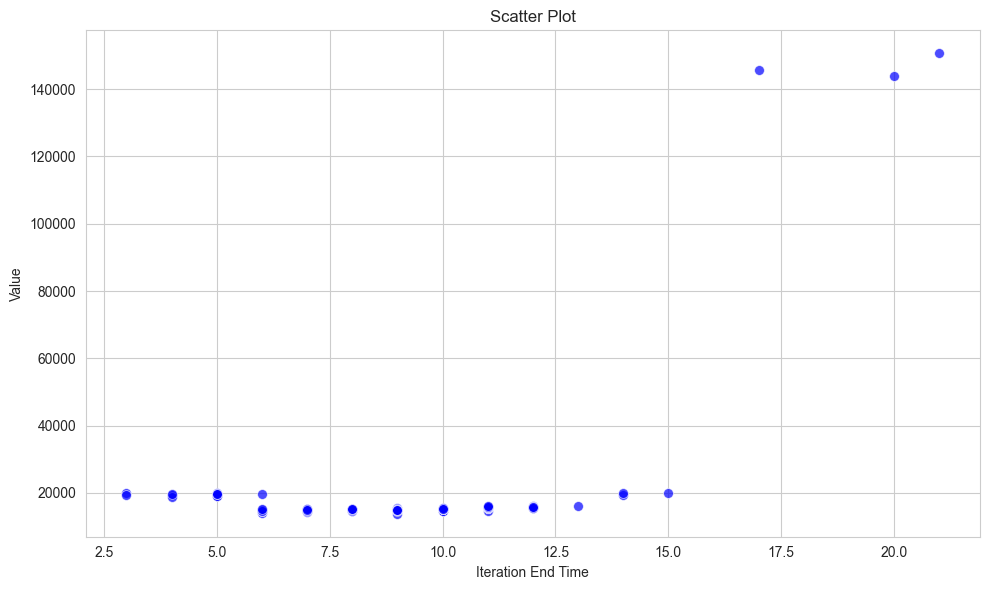

In [198]:

plt.figure(figsize=(10, 6))

# Plot the scatter plot
sns.scatterplot(data=data, x=data['Iteration_End_Hours'], y=data.value, color='blue', alpha=0.7, s=50)

# Set the x-axis label
plt.xlabel('Iteration End Time')

# Set the y-axis label
plt.ylabel('Value')

# Set the title
plt.title('Scatter Plot')

# Customize the plot aesthetics
sns.set_style("whitegrid")
plt.xticks
plt.tight_layout()

# Display the plot
plt.show()


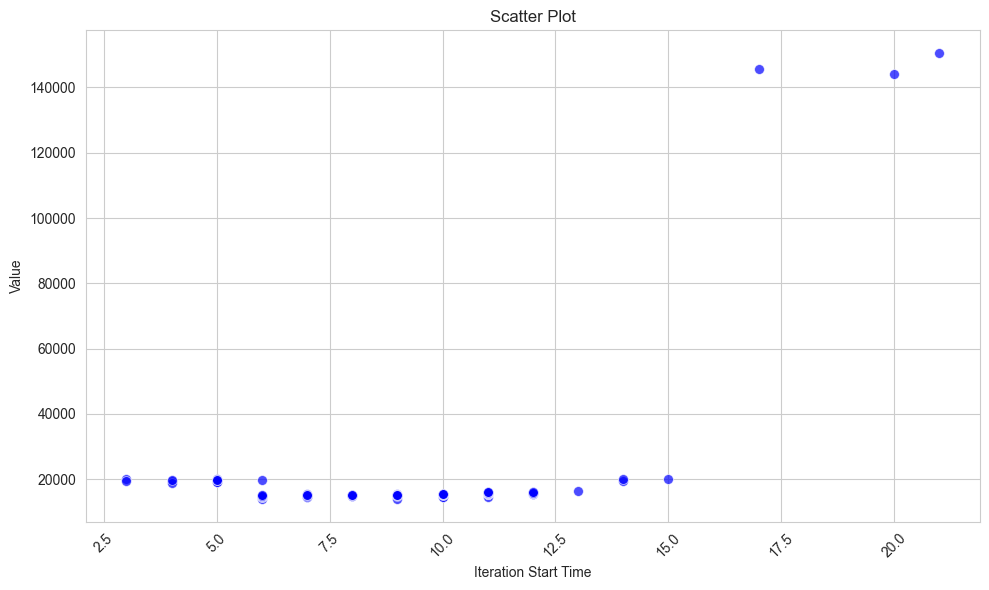

In [199]:

plt.figure(figsize=(10, 6))

# Plot the scatter plot
sns.scatterplot(data=data, x=data['Iteration_End_Hours'], y=data.value, color='blue', alpha=0.7, s=50)

# Set the x-axis label
plt.xlabel('Iteration Start Time')

# Set the y-axis label
plt.ylabel('Value')

# Set the title
plt.title('Scatter Plot')

# Customize the plot aesthetics
sns.set_style("whitegrid")
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


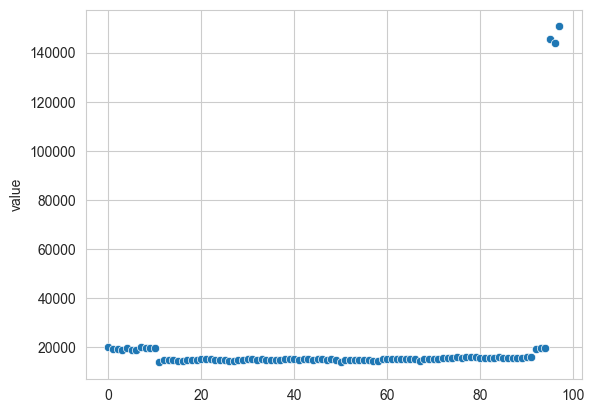

In [114]:
sns.scatterplot(data.value)
plt.show()

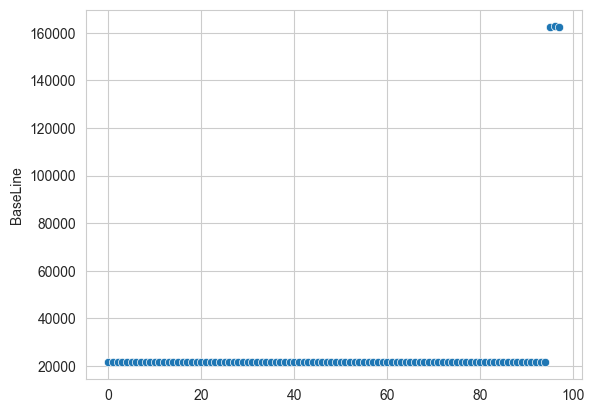

In [116]:
sns.scatterplot(data.BaseLine)
plt.show()

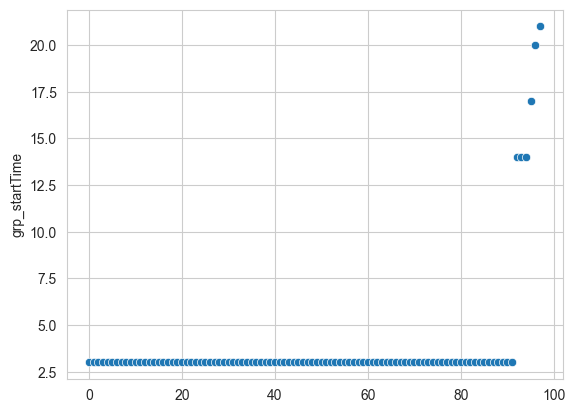

In [117]:
sns.scatterplot(data.grp_startTime)
plt.show()

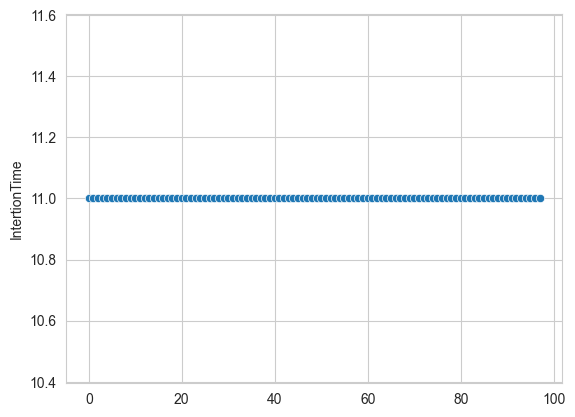

In [119]:
sns.scatterplot(data.IntertionTime)
plt.show()

In [126]:
# Select the columns to be used for anomaly detection (IterationStartTime, IterationEndTime, value, BaseLine, grp_startTime, IntertionTime)
columns = ['IterationStartTime', 'IterationEndTime', 'value', 'BaseLine', 'grp_startTime', 'IntertionTime']
use_data = data[columns]


In [128]:
# Convert datetime columns to numerical format (e.g., Unix timestamp)
for col in ['IterationStartTime', 'IterationEndTime', 'grp_startTime', 'IntertionTime']:
    use_data[col] = pd.to_datetime(use_data[col]).astype('int64') // 10**9  # Convert to int64 instead of int32


In [143]:
# Initialize and fit the Isolation Forest model
model = IsolationForest(contamination='auto', random_state=42)  # Adjust the contamination parameter as needed
model.fit(use_data)


IsolationForest(random_state=42)

In [144]:
# Predict anomalies for the data points
predictions = model.predict(use_data)


In [145]:

exclude_columns = ['TestName', 'Metadata', 'MetricName', 'Grp_id']

data['Anomaly'] = predictions
anomalies = data[data['Anomaly'] == -1]

anomalies = anomalies.drop(columns=exclude_columns)

print(tabulate(anomalies, headers='keys', tablefmt='pretty'))


+----+------------+----------------------------+----------------------------+----------+--------------------+---------------+---------------+-------+-----------------------+---------------------+---------+
|    | Unnamed: 0 |     IterationStartTime     |      IterationEndTime      |  value   |      BaseLine      | grp_startTime | IntertionTime | Hours | Iteration_Start_Hours | Iteration_End_Hours | Anomaly |
+----+------------+----------------------------+----------------------------+----------+--------------------+---------------+---------------+-------+-----------------------+---------------------+---------+
| 0  |     0      | 2023-04-27 03:38:54.263752 | 2023-04-27 03:43:04.657833 | 20016.0  | 21533.33942940746  |       3       |      11       |   3   |           3           |          3          |   -1    |
| 1  |     1      | 2023-04-27 03:55:31.765902 | 2023-04-27 03:59:45.787353 | 19399.0  |      21531.9       |       3       |      11       |   3   |           3           |   

In [146]:
total_anomalies = len(anomalies)
total_data = len(data)
percentage_anomalies = (total_anomalies/total_data)*100
print("Total Anomalies In the Dtaset: ",total_anomalies)
print(f"Percentage of anomalies: {percentage_anomalies:.2f}%")

Total Anomalies In the Dtaset:  19
Percentage of anomalies: 19.39%


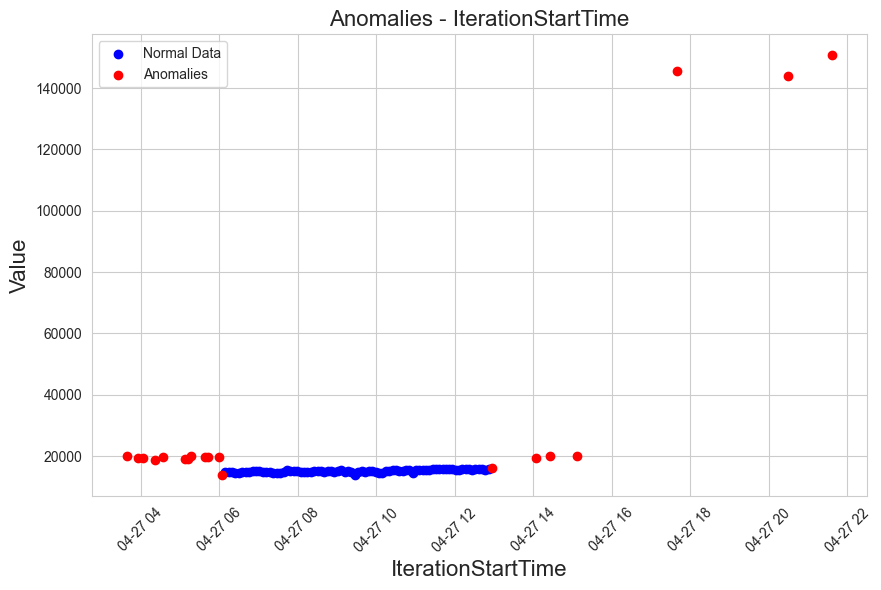

In [220]:
# Convert 'IterationStartTime' column to datetime with the correct format
data['IterationStartTime'] = pd.to_datetime(data['IterationStartTime'], format='%Y-%m-%d %H:%M:%S.%f')

# Plotting the anomalies for IterationStartTime
plt.figure(figsize=(10, 6))
normal_data = data[data['Anomaly'] == 1]
anomalies = data[data['Anomaly'] == -1]
plt.scatter(normal_data['IterationStartTime'], normal_data['value'], label='Normal Data', color='blue')
plt.scatter(anomalies['IterationStartTime'], anomalies['value'], label='Anomalies', color='red')
plt.xlabel('IterationStartTime',fontsize="16")
plt.ylabel('Value',fontsize="16")
plt.title('Anomalies - IterationStartTime',fontsize="16")
plt.legend()

# Set the x-axis ticks
plt.xticks(rotation=45)

plt.show()


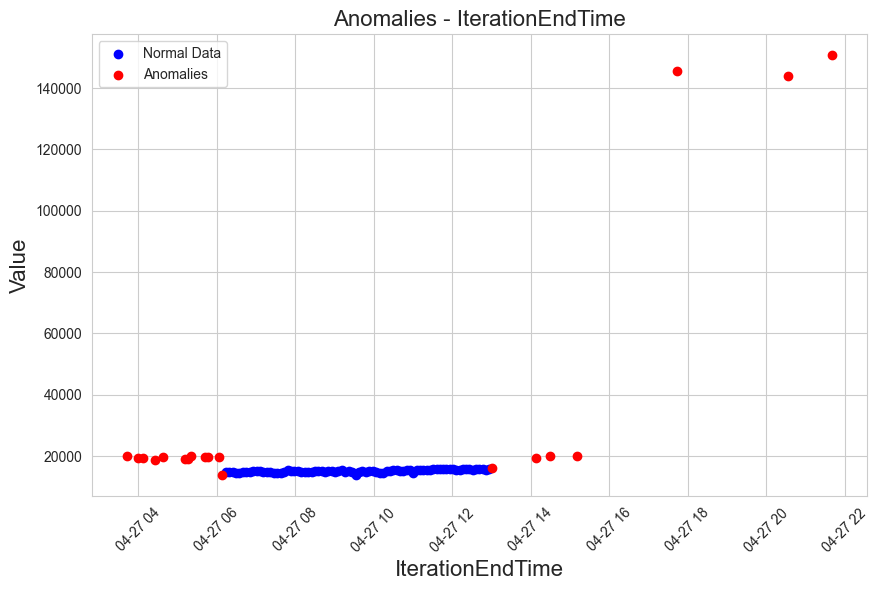

In [221]:
# Convert 'IterationStartTime' column to datetime with the correct format
data['IterationEndTime'] = pd.to_datetime(data['IterationEndTime'], format='%Y-%m-%d %H:%M:%S.%f')

# Plotting the anomalies for IterationStartTime
plt.figure(figsize=(10, 6))
normal_data = data[data['Anomaly'] == 1]
anomalies = data[data['Anomaly'] == -1]
plt.scatter(normal_data['IterationEndTime'], normal_data['value'], label='Normal Data', color='blue')
plt.scatter(anomalies['IterationEndTime'], anomalies['value'], label='Anomalies', color='red')
plt.xlabel('IterationEndTime',fontsize="16")
plt.ylabel('Value',fontsize="16")
plt.title('Anomalies - IterationEndTime',fontsize="16")
plt.legend()

# Set the x-axis ticks
plt.xticks(rotation=45)

plt.show()


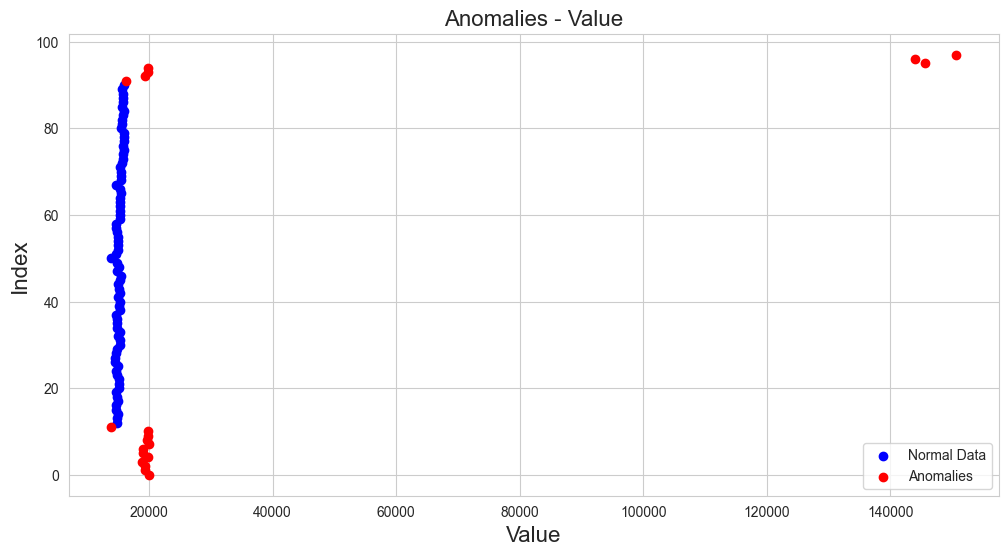

In [228]:
# Plotting the anomalies for value
plt.figure(figsize=(12, 6))
normal_data = data[data['Anomaly'] == 1]
anomalies = data[data['Anomaly'] == -1]
plt.scatter(normal_data['value'], normal_data.index, label='Normal Data', color='blue')
plt.scatter(anomalies['value'], anomalies.index, label='Anomalies', color='red')
plt.xlabel('Value',fontsize="16")
plt.ylabel('Index',fontsize="16")
plt.title('Anomalies - Value',fontsize="16")
plt.legend()
plt.show()


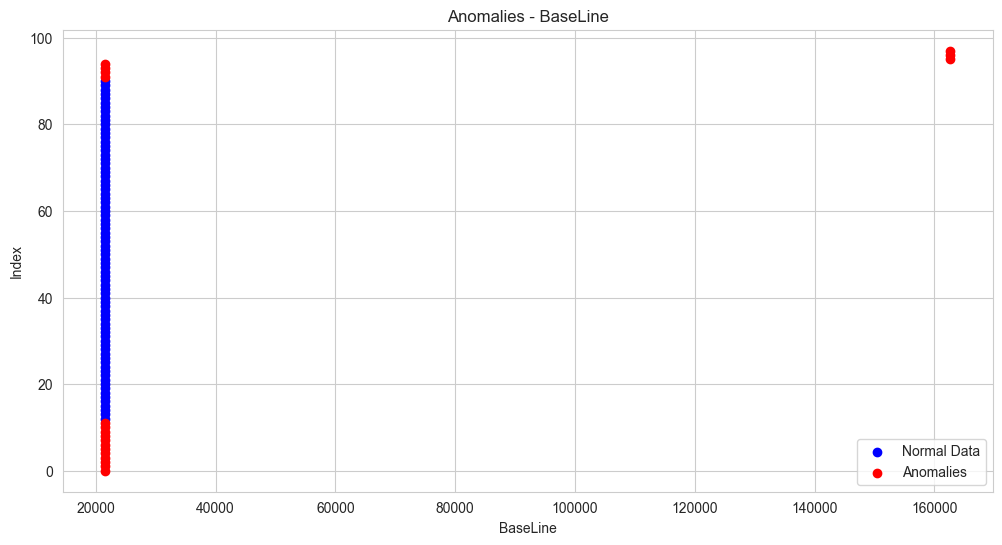

In [232]:
# Plotting the anomalies for BaseLine
plt.figure(figsize=(12, 6))
normal_data = data[data['Anomaly'] == 1]
anomaly_data = data[data['Anomaly'] == -1]
plt.scatter(normal_data['BaseLine'], normal_data.index, color='blue', label='Normal Data')
plt.scatter(anomaly_data['BaseLine'], anomaly_data.index, color='red', label='Anomalies')
plt.xlabel('BaseLine')
plt.ylabel('Index')
plt.title('Anomalies - BaseLine')
plt.legend()
plt.show()


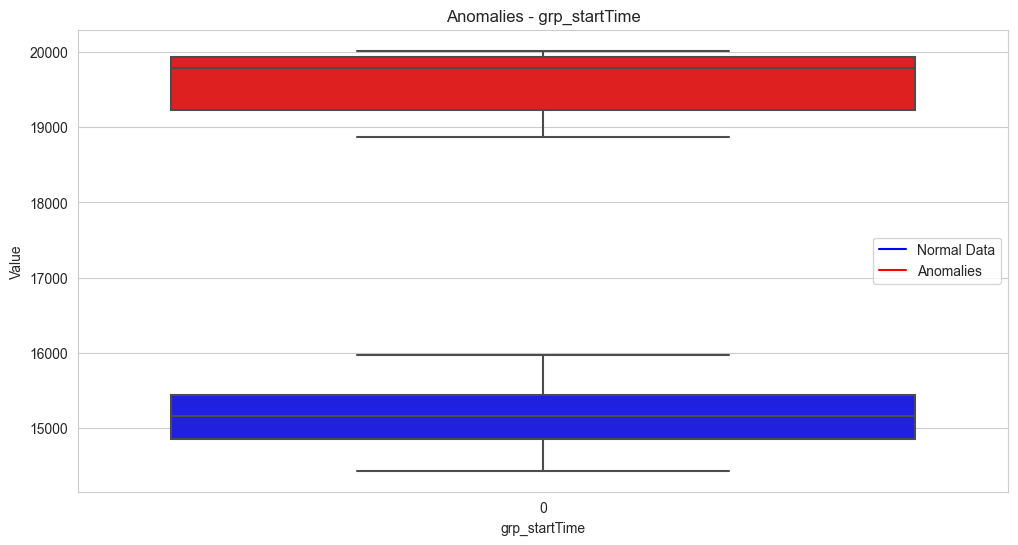

In [236]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a box plot for grp_startTime
plt.figure(figsize=(12, 6))

# Separate the data points based on anomalies
normal_data = data[data['Anomaly'] == 1]
anomaly_data = data[data['Anomaly'] == -1]

# Create a box plot for normal data
sns.boxplot(x=normal_data['grp_startTime'], y=normal_data['value'], color='blue', showfliers=False)

# Create a box plot for anomalies
sns.boxplot(x=anomaly_data['grp_startTime'], y=anomaly_data['value'], color='red', showfliers=False)

# Add legend manually
plt.plot([], color='blue', label='Normal Data')
plt.plot([], color='red', label='Anomalies')
plt.legend()

plt.xlabel('grp_startTime')
plt.ylabel('Value')
plt.title('Anomalies - grp_startTime')
plt.show()


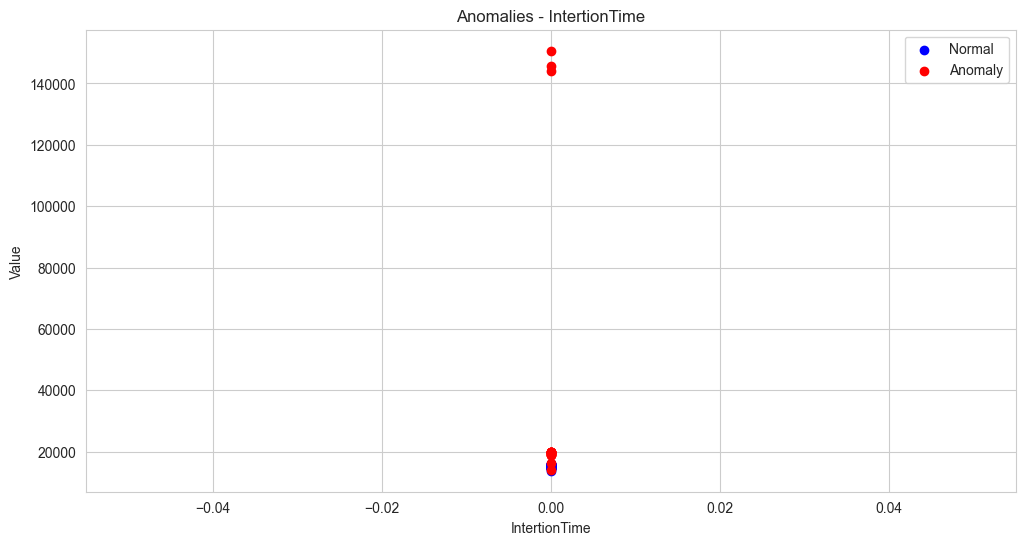

In [240]:
# Create a custom colormap for normal data and anomalies
colors = ['blue', 'red']
cmap = mpl.colors.ListedColormap(colors)

# Plotting the anomalies for IntertionTime
plt.figure(figsize=(12, 6))
# Plot normal data points
plt.scatter(data['IntertionTime'][data['Anomaly'] == 1], data['value'][data['Anomaly'] == 1], c='blue', label='Normal')
# Plot anomaly data points
plt.scatter(data['IntertionTime'][data['Anomaly'] == -1], data['value'][data['Anomaly'] == -1], c='red', label='Anomaly')
plt.xlabel('IntertionTime')
plt.ylabel('Value')
plt.title('Anomalies - IntertionTime')
plt.legend()
plt.show()
